In [11]:
import numpy as np
from scipy import linalg

A = np.random.randn(4,5) 

A

array([[ 0.3980133 ,  0.27619663, -0.72232737,  1.16992232, -0.23262888],
       [ 0.19218675,  0.12097055, -0.22734517, -1.04868168,  0.44184943],
       [ 1.52584282,  0.61843639, -0.68072534, -0.6581828 , -0.1038144 ],
       [ 1.5570781 ,  0.03965957,  1.14519641,  0.10119659, -0.25208261]])

In [12]:
U, S, Vt = linalg.svd(A)

In [13]:
U

array([[ 0.05834263, -0.64997604, -0.59054692,  0.47474374],
       [ 0.16208752,  0.63468258, -0.07840165,  0.75150438],
       [ 0.71368808,  0.23671483, -0.51792646, -0.40788185],
       [ 0.67895   , -0.34449276,  0.61388899,  0.20854721]])

In [14]:
S

array([2.33010727, 1.73460447, 1.58711242, 0.22290555])

In [15]:
Vt

array([[ 0.94438838,  0.21630738,  0.09128904, -0.21576331, -0.08033815],
       [-0.17983007,  0.01728771, -0.1328523 , -0.93200763,  0.28473555],
       [-0.05325052, -0.29522128,  0.94510103, -0.12958244,  0.00110517],
       [ 0.16035591, -0.0984523 ,  0.0121654 ,  0.25521798,  0.94831899],
       [ 0.21735249, -0.92523716, -0.28399407, -0.05366708, -0.11472276]])

In [9]:
import numpy as np

class SVD:
    def __init__(self, A):
        self.A = A
        self.U, self.S, self.VT, _ = self._svd()

    def _svd(self):
        ATA = np.dot(self.A.T, self.A)
        AAT = np.dot(self.A, self.A.T)

        _, VT = np.linalg.eig(ATA)
        _, U = np.linalg.eig(AAT)

        singular_values_indices = np.argsort(np.abs(np.linalg.eigvals(ATA)))[::-1]
        singular_values = np.sqrt(np.abs(np.linalg.eigvals(ATA[singular_values_indices])))
        U = U[:, singular_values_indices]
        VT = VT[:, singular_values_indices]

        S = np.diag(singular_values)

        reconstructed_A = U.dot(S).dot(VT.T)

        return U, S, VT.T, reconstructed_A

    def get_singular_values(self):
        return np.diag(self.S)

    def get_singular_vectors(self):
        return self.U, self.VT

    def reconstruct_original_matrix(self):
        return self.U.dot(self.S).dot(self.VT.T)

A = np.array([[160, 55, 25],
              [165, 60, 30],
              [170, 65, 35],
              [175, 70, 40],
              [180, 75, 45]])

svd_instance = SVD(A)

singular_values = svd_instance.get_singular_values()
U, VT = svd_instance.get_singular_vectors()
reconstructed_A = svd_instance.reconstruct_original_matrix()

print("Original Matrix A:\n", A)
print("\nSingular Value Decomposition:")
print("Singular Values:\n", singular_values)
print("U:\n", U)
print("V^T:\n", VT)
print("\nReconstructed Matrix from U, S, and V^T:\n", reconstructed_A)

Original Matrix A:
 [[160  55  25]
 [165  60  30]
 [170  65  35]
 [175  70  40]
 [180  75  45]]

Singular Value Decomposition:
Singular Values:
 [4.15067759e+02 1.47903913e+01 1.75529724e-06]
U:
 [[-4.11380061e-01 -6.56328001e-01 -6.32455532e-01]
 [-4.28951368e-01 -3.40588791e-01  6.32455532e-01]
 [-4.46522674e-01 -2.48495798e-02  3.16227766e-01]
 [-4.64093980e-01  2.90889631e-01 -2.97154604e-14]
 [-4.81665287e-01  6.06628842e-01 -3.16227766e-01]]
V^T:
 [[-0.91653189 -0.35174603 -0.19037863]
 [-0.36071948  0.52134166  0.77335912]
 [ 0.17277369 -0.77748158  0.6047079 ]]

Reconstructed Matrix from U, S, and V^T:
 [[159.91289175  56.53222225 -21.95392679]
 [164.95479653  61.59766992 -26.84477908]
 [169.99670183  66.66311545 -31.73563304]
 [175.03860714  71.72856097 -36.626487  ]
 [180.08051245  76.7940065  -41.51734096]]


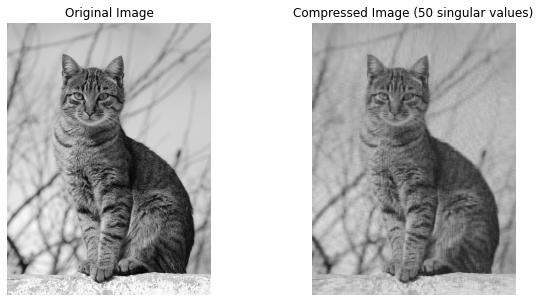

In [3]:
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt
from skimage import io, color

image_path = 'cat.jpg'
original_image = io.imread(image_path)
original_image_gray = color.rgb2gray(original_image)  

U, S, VT = svd(original_image_gray, full_matrices=False)

# Choose the number of singular values to retain (compression)
num_singular_values_to_retain = 50

# Truncate the matrices to retain only the selected singular values
U_truncated = U[:, :num_singular_values_to_retain]
S_truncated = np.diag(S[:num_singular_values_to_retain])
VT_truncated = VT[:num_singular_values_to_retain, :]

# Reconstruct the compressed image
compressed_image = U_truncated.dot(S_truncated).dot(VT_truncated)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_image_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Compressed Image ({num_singular_values_to_retain} singular values)')
plt.imshow(compressed_image, cmap='gray')
plt.axis('off')

plt.show()

1. **Load the Image:**
   - The code starts by loading an image from a specified path. For simplicity, the image is converted to grayscale.

2. **Singular Value Decomposition (SVD):**
   - SVD is a mathematical technique that decomposes a matrix into three matrices: U, Σ (Sigma), and V^T (transpose of V). In the context of images, it can capture important patterns and features.

3. **Choose the Number of Singular Values to Retain:**
   - The user can specify how many singular values to keep. This determines the level of compression. A smaller number retains fewer details, resulting in a more compressed image.

4. **Truncate the Matrices:**
   - The matrices obtained from SVD are truncated by keeping only a specified number of singular values. This effectively reduces the dimensionality of the data.

5. **Reconstruct the Compressed Image:**
   - The compressed image is reconstructed using the truncated matrices. The reconstructed image contains less information but retains the essential features captured by the retained singular values.

6. **Display Original and Compressed Images:**
   - The original grayscale image and the compressed image are displayed side by side for visual comparison. The compressed image shows the effect of reducing the number of singular values on the image quality.

SVD allows for the compression of images by capturing the most important information and discarding less critical details. The user can control the trade-off between compression and image quality by choosing the number of singular values to retain. The displayed images visually illustrate this trade-off.

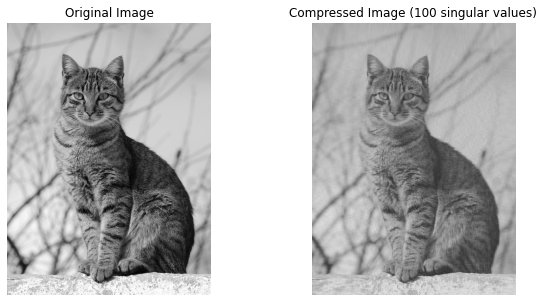

In [6]:
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt
from skimage import io, color

image_path = 'cat.jpg'
original_image = io.imread(image_path)
original_image_gray = color.rgb2gray(original_image)  

U, S, VT = svd(original_image_gray, full_matrices=False)

# Choose the number of singular values to retain (compression)
num_singular_values_to_retain = 100

# Truncate the matrices to retain only the selected singular values
U_truncated = U[:, :num_singular_values_to_retain]
S_truncated = np.diag(S[:num_singular_values_to_retain])
VT_truncated = VT[:num_singular_values_to_retain, :]

# Reconstruct the compressed image
compressed_image = U_truncated.dot(S_truncated).dot(VT_truncated)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_image_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Compressed Image ({num_singular_values_to_retain} singular values)')
plt.imshow(compressed_image, cmap='gray')
plt.axis('off')

plt.show()

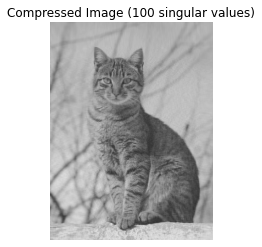

In [11]:
plt.title(f'Compressed Image ({num_singular_values_to_retain} singular values)')
plt.imshow(compressed_image, cmap='gray')
plt.axis('off')
plt.show()